<a href="https://colab.research.google.com/github/iMba-I/Labs/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сам класс (инициализация, прямой и обратный проход, обновление параметров, обучение) и подключение библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(42)


class NeuralNetwork:
    def __init__(self, input_size, architecture, output_size=1):
        layer_sizes = [input_size] + architecture + [output_size]
        self.L = len(layer_sizes) - 1

        self.weights = []
        self.biases = []
        for i in range(self.L):
            W = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
            b = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(W)
            self.biases.append(b)


        self.train_mse = []
        self.train_mae = []
        self.train_r2 = []

    def forward(self, X):
        activations = [X]
        zs = []

        A = X
        for i in range(self.L):
            Z = A @ self.weights[i] + self.biases[i]
            if (i!=self.L):
              Z = np.maximum(0,Z)

            A = Z
            zs.append(Z)
            activations.append(A)

        return A, zs, activations

    def backward(self, y, zs, activations):
        m = y.shape[0]
        y = y.reshape(-1, 1)

        grads_W = [None] * self.L
        grads_b = [None] * self.L

        dA = (2 / m) * (activations[-1] - y)

        for i in reversed(range(self.L)):
            A_prev = activations[i]
            dZ = dA

            grads_W[i] = A_prev.T @ dZ
            grads_b[i] = np.sum(dZ, axis=0, keepdims=True)
            dA = dZ @ self.weights[i].T

        return grads_W, grads_b

    def update_params(self, grads_W, grads_b, lr):
        for i in range(self.L):
            self.weights[i] -= lr * grads_W[i]
            self.biases[i]  -= lr * grads_b[i]

    def predict(self, X):
        y_pred, _, _ = self.forward(X)
        return y_pred.ravel()

    def fit(self, X, y, lr=0.00001, epochs=200, batch_size=32):
        m = X.shape[0]

        for epoch in range(1, epochs + 1):
            perm = np.random.permutation(m)
            X_shuffled = X[perm]
            y_shuffled = y[perm]

            for start in range(0, m, batch_size):
                end = min(start + batch_size, m)
                xb = X_shuffled[start:end]
                yb = y_shuffled[start:end]

                y_pred, zs, activations = self.forward(xb)
                grads_W, grads_b = self.backward(yb, zs, activations)
                self.update_params(grads_W, grads_b, lr)


            y_train_pred = self.predict(X)
            mse = mean_squared_error(y, y_train_pred)
            mae = mean_absolute_error(y, y_train_pred)
            r2 = r2_score(y, y_train_pred)

            self.train_mse.append(mse)
            self.train_mae.append(mae)
            self.train_r2.append(r2)

            if epoch % 10 == 0 or epoch == 1:
                print(f"Epoch {epoch}: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")


Загрузка и подготовка данных

In [ ]:
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Создание и обучение модели

In [ ]:

nn = NeuralNetwork(
    input_size=X.shape[1],
    architecture=[20, 20],
    output_size=1
)


nn.fit(
    X_train, y_train,
    lr=0.00005,
    epochs=800,
    batch_size=32
)


y_train_pred = nn.predict(X_train)


Epoch 1: MSE=5.2083, MAE=1.9676, R²=-2.8962
Epoch 10: MSE=2.8631, MAE=1.2729, R²=-1.1418
Epoch 20: MSE=1.8772, MAE=0.9777, R²=-0.4042
Epoch 30: MSE=1.5268, MAE=0.8963, R²=-0.1421
Epoch 40: MSE=1.4030, MAE=0.8859, R²=-0.0495
Epoch 50: MSE=1.3596, MAE=0.8918, R²=-0.0171
Epoch 60: MSE=1.3445, MAE=0.8993, R²=-0.0058
Epoch 70: MSE=1.3393, MAE=0.9048, R²=-0.0019
Epoch 80: MSE=1.3374, MAE=0.9083, R²=-0.0005
Epoch 90: MSE=1.3368, MAE=0.9105, R²=0.0000
Epoch 100: MSE=1.3365, MAE=0.9119, R²=0.0002
Epoch 110: MSE=1.3364, MAE=0.9127, R²=0.0003
Epoch 120: MSE=1.3363, MAE=0.9131, R²=0.0003
Epoch 130: MSE=1.3363, MAE=0.9134, R²=0.0004
Epoch 140: MSE=1.3362, MAE=0.9135, R²=0.0004
Epoch 150: MSE=1.3361, MAE=0.9136, R²=0.0005
Epoch 160: MSE=1.3360, MAE=0.9136, R²=0.0006
Epoch 170: MSE=1.3360, MAE=0.9136, R²=0.0006
Epoch 180: MSE=1.3359, MAE=0.9136, R²=0.0007
Epoch 190: MSE=1.3357, MAE=0.9136, R²=0.0008
Epoch 200: MSE=1.3356, MAE=0.9136, R²=0.0009
Epoch 210: MSE=1.3355, MAE=0.9135, R²=0.0010
Epoch 220: M

Визуализация  по признакам

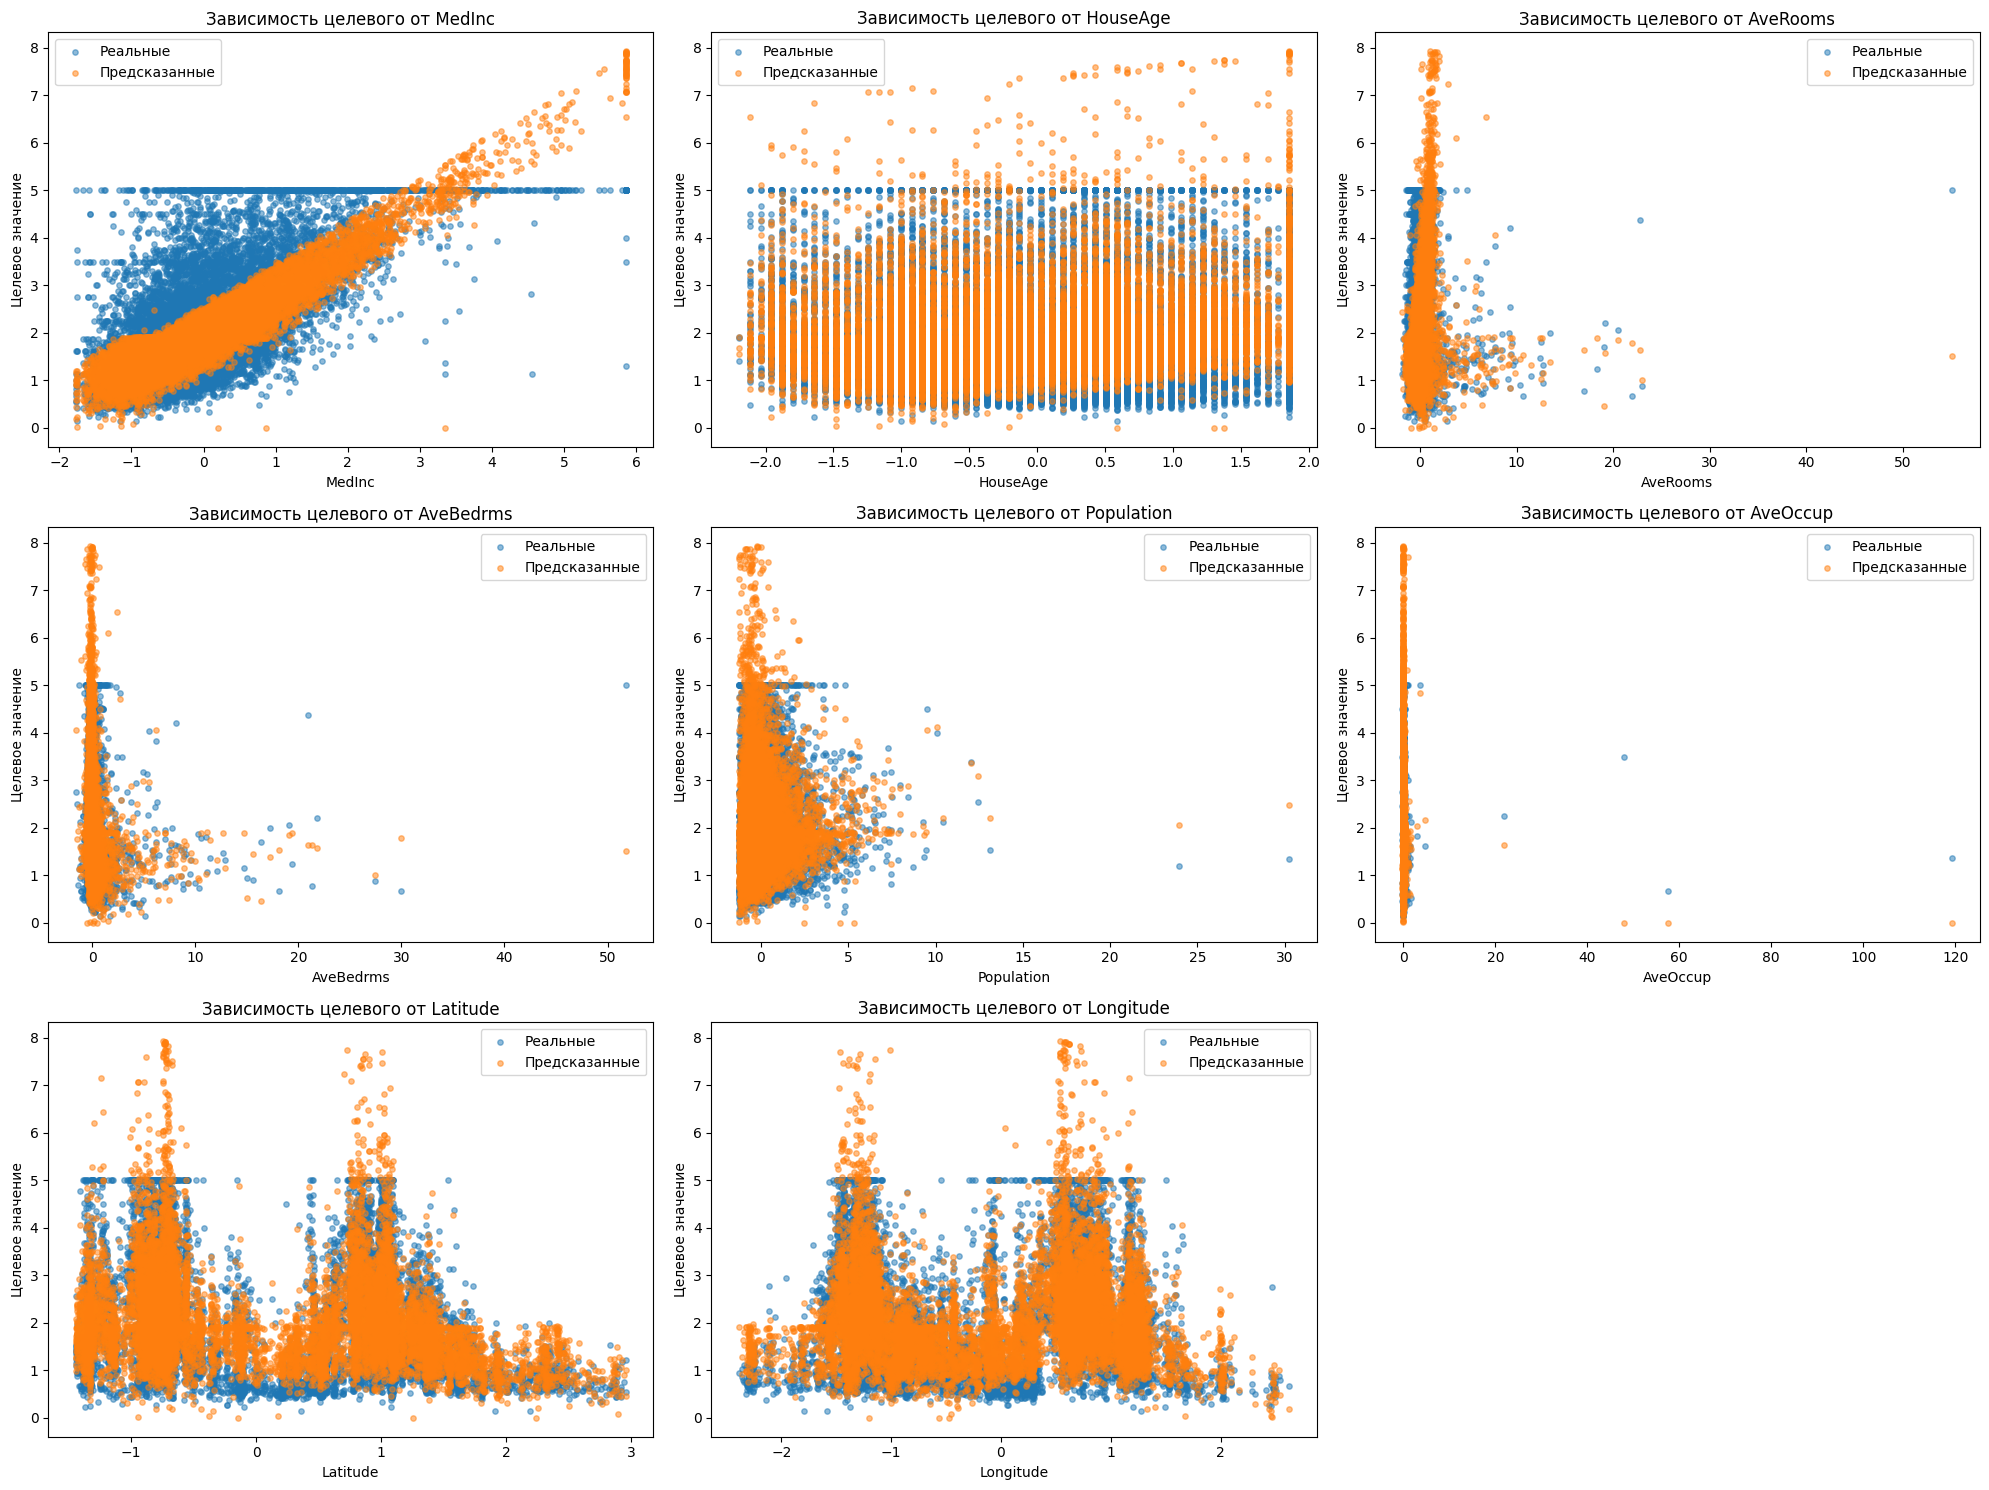

In [ ]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    plt.scatter(X_train[:, i], y_train, label='Реальные', alpha=0.5, s=15)
    plt.scatter(X_train[:, i], y_train_pred, label='Предсказанные', alpha=0.5, s=15)
    plt.xlabel(feature)
    plt.ylabel('Целевое значение')
    plt.title(f'Зависимость целевого от {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

Визуализация метрик

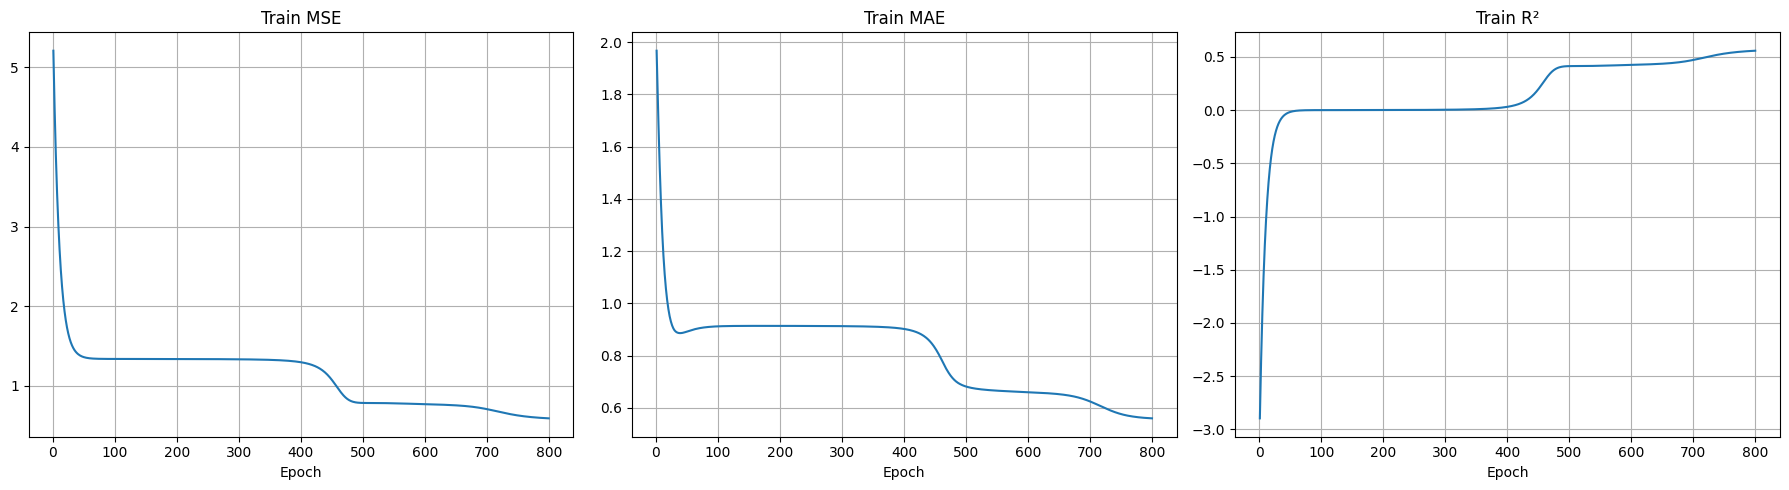

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(nn.train_mse) + 1), nn.train_mse)
plt.title('Train MSE')
plt.xlabel('Epoch')
plt.grid(True)

# --- 2. MAE ---
plt.subplot(1, 3, 2)
plt.plot(range(1, len(nn.train_mae) + 1), nn.train_mae)
plt.title('Train MAE')
plt.xlabel('Epoch')
plt.grid(True)

# --- 3. R² ---
plt.subplot(1, 3, 3)
plt.plot(range(1, len(nn.train_r2) + 1), nn.train_r2)
plt.title('Train R²')
plt.xlabel('Epoch')
plt.grid(True)

plt.tight_layout()
plt.show()

pytorch


Epoch 10, loss=270.8458
Epoch 20, loss=271.0319
Epoch 30, loss=270.8860
Epoch 40, loss=271.5904
Epoch 50, loss=270.5672
Epoch 60, loss=269.0865
Epoch 70, loss=270.6653
Epoch 80, loss=269.0446
Epoch 90, loss=268.6083
Epoch 100, loss=269.5235

PyTorch MSE: 0.5564185976982117
PyTorch MAE: 0.5274168848991394
PyTorch R² : 0.575385570526123


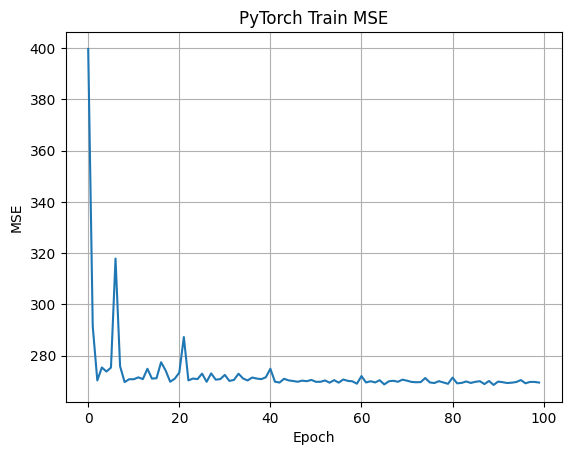

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# ======================================
# Загрузка и подготовка данных
# ======================================
data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# ======================================
# Модель PyTorch без активаций
# ======================================
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X.shape[1], 50)
        self.fc2 = nn.Linear(50, 20)
        self.fc3 = nn.Linear(20, 10)
        self.fc4 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
batch_size = 32

train_losses = []

# ======================================
# Обучение
# ======================================
for epoch in range(epochs):
    permutation = torch.randperm(X_train.size()[0])

    epoch_loss = 0

    for i in range(0, X_train.size(0), batch_size):
        idx = permutation[i:i+batch_size]
        xb = X_train[idx]
        yb = y_train[idx]

        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss)

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, loss={epoch_loss:.4f}")

# ======================================
# Оценка
# ======================================
model.eval()
y_pred = model(X_test).detach().numpy().ravel()
y_test_np = y_test.numpy().ravel()

print("\nPyTorch MSE:", mean_squared_error(y_test_np, y_pred))
print("PyTorch MAE:", mean_absolute_error(y_test_np, y_pred))
print("PyTorch R² :", r2_score(y_test_np, y_pred))

# ======================================
# График MSE по эпохам
# ======================================
plt.plot(train_losses)
plt.title("PyTorch Train MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


tensorflow


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3792 - mae: 1.2033 - val_loss: 0.5481 - val_mae: 0.5415
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5440 - mae: 0.5410 - val_loss: 0.5659 - val_mae: 0.5331
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5575 - mae: 0.5314 - val_loss: 0.5604 - val_mae: 0.5385
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6476 - mae: 0.5306 - val_loss: 0.5449 - val_mae: 0.5314
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5376 - mae: 0.5384 - val_loss: 0.5595 - val_mae: 0.5321
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5412 - mae: 0.5382 - val_loss: 0.5485 - val_mae: 0.5299
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5547 - mae: 0.5365 - val_loss: 0.5486 - val_mae: 0.5360
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5188 - mae: 0.5277 - val_loss: 0.5521 - val_mae: 0.5387
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

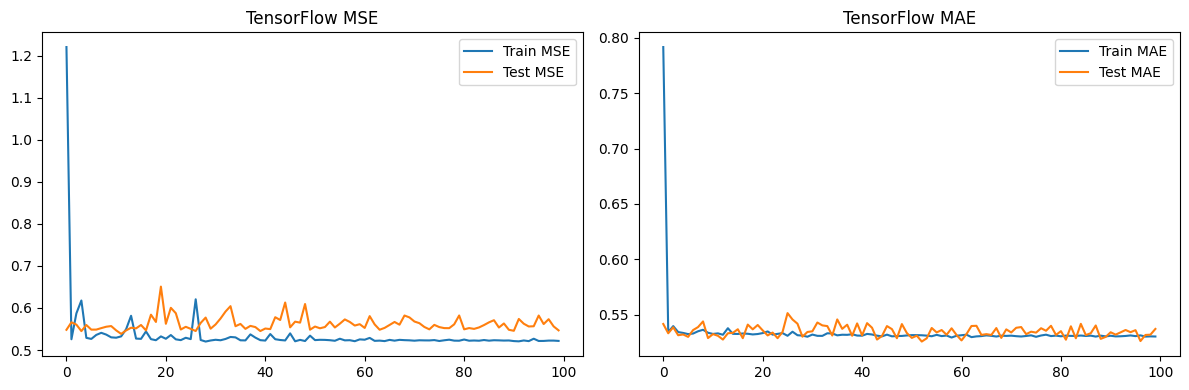

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras

# ======================================
# Загрузка и подготовка данных
# ======================================
data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================================
# Модель Keras (линейные слои без активаций)
# ======================================
model = keras.Sequential([
    keras.layers.Dense(20, activation=None, input_shape=(X.shape[1],)),
    keras.layers.Dense(10, activation=None),
    keras.layers.Dense(1, activation=None)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# ======================================
# Оценка
# ======================================
y_pred = model.predict(X_test).ravel()

print("TF MSE:", mean_squared_error(y_test, y_pred))
print("TF MAE:", mean_absolute_error(y_test, y_pred))
print("TF R² :", r2_score(y_test, y_pred))

# ======================================
# Графики обучения
# ======================================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.legend()
plt.title("TensorFlow MSE")

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.legend()
plt.title("TensorFlow MAE")

plt.tight_layout()
plt.show()
